# Installing wordcloud library

In [1]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install wordcloud

# Loading libraries

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
print("Libraries loaded!")

Libraries loaded!


# Generating cloud for patient case example

<b>Load cases</b>

In [3]:
import pandas as pd

df1= pd.read_csv('cases.csv',encoding='latin-1')
df1=df1.drop(['Unnamed: 3'], axis=1)
df1=df1.drop(['Notes'], axis=1)

df1=df1.dropna()
df1.head(30)


,Case,Label
0,A 21 year-old university student was found to ...,1.0
1,"In September 1998, a 36-year-old male soldier ...",1.0
2,A 55-year-old male soldier in the French Forei...,1.0
3,"A 20-year-old woman, in her first trimester of...",1.0
4,A 27 year old Hispanic man developed a cough a...,1.0
5,59 year old male moved from Philippines in 197...,1.0
6,20 year old male that migrated from Mexico. Pa...,1.0
7,"40 year old white female. U. S. born. Cough, f...",1.0
8,"Chief Complaint: Productive cough, weight loss...",1.0
9,A 22 year-old Asian male smoker presented with...,1.0


<b>View cloud for one case</b>


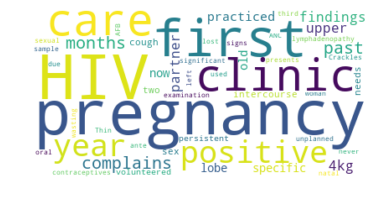

In [4]:
text = df1.Case[3]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",max_words=50).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Save word cloud as image

In [32]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

<b>Combine all case reports</b>

In [5]:
text = " ".join(case for case in df1.Case)
print ("There are %d words in the combination of all cases." % len(text))

There are 30299 words in the combination of all cases.


__Create word cloud__

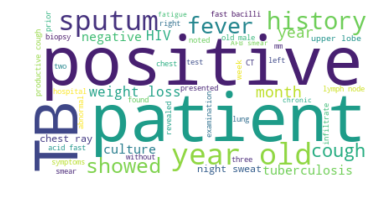

In [12]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=None, background_color="white",max_words=50).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import string
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

# fit our vectorizer. This will take a while depending on your computer. 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)
# this could take a while
vect.fit(df1.Case.values)
# get the column names
vect.get_feature_names()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kyle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['a',
 'abd',
 'abdomen',
 'abdominal',
 'able',
 'abnormal',
 'abnormalities',
 'about',
 'abscesses',
 'absent',
 'abuse',
 'accommodation',
 'accompanied',
 'accumulation',
 'aching\x92',
 'acid',
 'acquired',
 'active',
 'addiction',
 'addition',
 'additionally',
 'adenopathy',
 'adequate',
 'admission',
 'admitted',
 'adoption',
 'adults',
 'ae',
 'aerospace',
 'afb',
 'afebrile',
 'affecting',
 'afp',
 'afs',
 'after',
 'age',
 'aged',
 'agency',
 'air',
 'airborne',
 'airway',
 'alcohol',
 'alertness',
 'all',
 'alpha',
 'also',
 'altered',
 'although',
 'alveolar',
 'amebiasis',
 'american',
 'amount',
 'amplification',
 'an',
 'analysis',
 'anatomical',
 'anc',
 'and',
 'anemia',
 'angle',
 'annual',
 'annular',
 'anomalies',
 'anorexia',
 'another',
 'ante',
 'antenatal',
 'anterior',
 'anti',
 'antibiotics',
 'antibody',
 'antigen',
 'antiretroviral',
 'antituberculosis',
 'any',
 'anyone',
 'apartment',
 'apex',
 'apicoposterior',
 'appeared',
 'appetite',
 'april',
 'are',

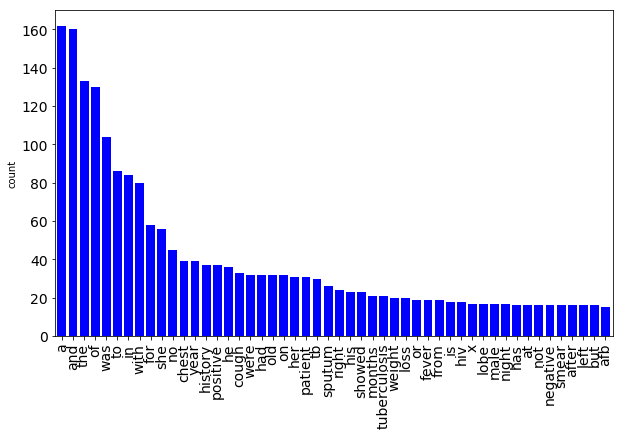

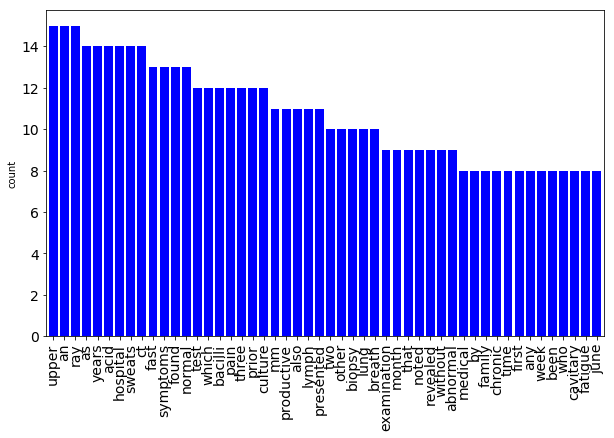

In [15]:
def plotFeatures(df1):   
    neg_doc_matrix = vect.transform(df1[df1.Label == 0].Case)
    pos_doc_matrix = vect.transform(df1[df1.Label == 1].Case)
    neg_tf = np.sum(neg_doc_matrix,axis=0)
    pos_tf = np.sum(pos_doc_matrix,axis=0)
    neg = np.squeeze(np.asarray(neg_tf))
    pos = np.squeeze(np.asarray(pos_tf))

    term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
    term_freq_df.columns = ['negative', 'positive']
    term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
    term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

    #Create a series from the sparse matrix
    d = pd.Series(term_freq_df.total, 
                  index = term_freq_df.index).sort_values(ascending=False)
    ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    
plotFeatures(df1)

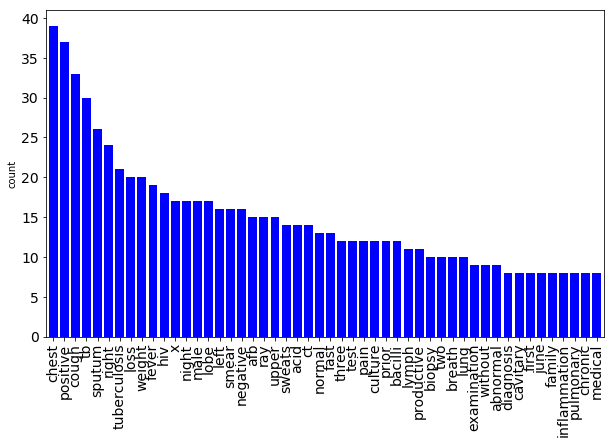

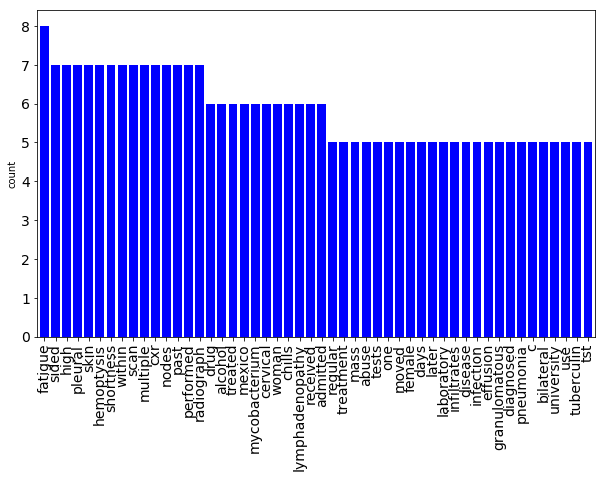

In [17]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['patient','showed','reported','noted','referred','figure','fig','cm','m','s','months', 'time','presented','revealed','mm', 'found','month', 'week','weeks', 'symptoms','year','years','finding','history','patient','clinic','hospital','presents','presented','old'])

vect = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizer_better, 
                       stop_words = stopwords)
# this could take a while
vect.fit(df1.Case.values)
plotFeatures(df1)

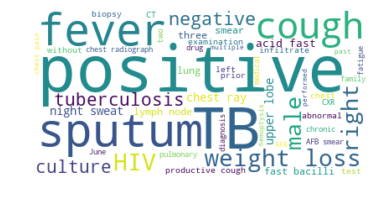

In [19]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()